## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9606716	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8558633	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8400199	total: 66.6ms	remaining: 7.34s
9:	learn: 0.8229065	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8057776	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7907426	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7753485	total: 70ms	remaining: 5.31s
13:	learn: 0.7601130	total: 70.9ms	remaining: 4.99s
14:	learn: 0.7475256	total: 71.6ms	remaining: 4.7s
15:	learn: 0.7326054	total: 72.5ms	remaining: 4.46s
16:	learn: 0.7206853	total: 73.4ms	remaining: 4.24s
17:	learn: 0.7077303	total: 74.1ms	remaining: 4.04s
18:	learn: 0.6955287	total: 74.9ms	remaining: 3.

106:	learn: 0.2980370	total: 150ms	remaining: 1.25s
107:	learn: 0.2965967	total: 151ms	remaining: 1.24s
108:	learn: 0.2951864	total: 151ms	remaining: 1.24s
109:	learn: 0.2942861	total: 152ms	remaining: 1.23s
110:	learn: 0.2932928	total: 153ms	remaining: 1.23s
111:	learn: 0.2916150	total: 154ms	remaining: 1.22s
112:	learn: 0.2903158	total: 155ms	remaining: 1.22s
113:	learn: 0.2893044	total: 156ms	remaining: 1.21s
114:	learn: 0.2880453	total: 157ms	remaining: 1.21s
115:	learn: 0.2868924	total: 158ms	remaining: 1.2s
116:	learn: 0.2854905	total: 159ms	remaining: 1.2s
117:	learn: 0.2838426	total: 160ms	remaining: 1.19s
118:	learn: 0.2827228	total: 161ms	remaining: 1.19s
119:	learn: 0.2820207	total: 161ms	remaining: 1.18s
120:	learn: 0.2807575	total: 162ms	remaining: 1.18s
121:	learn: 0.2800950	total: 163ms	remaining: 1.17s
122:	learn: 0.2793606	total: 164ms	remaining: 1.17s
123:	learn: 0.2786503	total: 165ms	remaining: 1.16s
124:	learn: 0.2775226	total: 166ms	remaining: 1.16s
125:	learn: 0.

154:	learn: 0.2497802	total: 192ms	remaining: 1.05s
155:	learn: 0.2490613	total: 193ms	remaining: 1.04s
156:	learn: 0.2484356	total: 194ms	remaining: 1.04s
157:	learn: 0.2475208	total: 195ms	remaining: 1.04s
158:	learn: 0.2467460	total: 196ms	remaining: 1.03s
159:	learn: 0.2461317	total: 197ms	remaining: 1.03s
160:	learn: 0.2456028	total: 198ms	remaining: 1.03s
161:	learn: 0.2449256	total: 199ms	remaining: 1.03s
162:	learn: 0.2444113	total: 200ms	remaining: 1.02s
163:	learn: 0.2438126	total: 201ms	remaining: 1.02s
164:	learn: 0.2432080	total: 202ms	remaining: 1.02s
165:	learn: 0.2425986	total: 202ms	remaining: 1.02s
166:	learn: 0.2421108	total: 203ms	remaining: 1.01s
167:	learn: 0.2413956	total: 204ms	remaining: 1.01s
168:	learn: 0.2407630	total: 205ms	remaining: 1.01s
169:	learn: 0.2401529	total: 206ms	remaining: 1s
170:	learn: 0.2391465	total: 207ms	remaining: 1s
171:	learn: 0.2383087	total: 207ms	remaining: 999ms
172:	learn: 0.2377594	total: 208ms	remaining: 996ms
173:	learn: 0.2373

313:	learn: 0.1727077	total: 339ms	remaining: 741ms
314:	learn: 0.1723778	total: 340ms	remaining: 740ms
315:	learn: 0.1720145	total: 341ms	remaining: 739ms
316:	learn: 0.1715627	total: 342ms	remaining: 737ms
317:	learn: 0.1714053	total: 343ms	remaining: 736ms
318:	learn: 0.1709797	total: 344ms	remaining: 734ms
319:	learn: 0.1706233	total: 345ms	remaining: 733ms
320:	learn: 0.1703284	total: 346ms	remaining: 731ms
321:	learn: 0.1700544	total: 346ms	remaining: 729ms
322:	learn: 0.1696955	total: 347ms	remaining: 728ms
323:	learn: 0.1695203	total: 349ms	remaining: 727ms
324:	learn: 0.1693707	total: 350ms	remaining: 727ms
325:	learn: 0.1690932	total: 351ms	remaining: 726ms
326:	learn: 0.1687871	total: 352ms	remaining: 725ms
327:	learn: 0.1684932	total: 353ms	remaining: 724ms
328:	learn: 0.1680740	total: 354ms	remaining: 723ms
329:	learn: 0.1676495	total: 355ms	remaining: 721ms
330:	learn: 0.1672606	total: 356ms	remaining: 720ms
331:	learn: 0.1669891	total: 357ms	remaining: 718ms
332:	learn: 

358:	learn: 0.1595903	total: 381ms	remaining: 680ms
359:	learn: 0.1593606	total: 382ms	remaining: 680ms
360:	learn: 0.1590600	total: 383ms	remaining: 679ms
361:	learn: 0.1587473	total: 384ms	remaining: 677ms
362:	learn: 0.1585815	total: 385ms	remaining: 676ms
363:	learn: 0.1583085	total: 386ms	remaining: 674ms
364:	learn: 0.1579830	total: 387ms	remaining: 673ms
365:	learn: 0.1576744	total: 388ms	remaining: 672ms
366:	learn: 0.1574980	total: 388ms	remaining: 670ms
367:	learn: 0.1573862	total: 389ms	remaining: 668ms
368:	learn: 0.1572274	total: 390ms	remaining: 667ms
369:	learn: 0.1568606	total: 391ms	remaining: 666ms
370:	learn: 0.1564609	total: 392ms	remaining: 664ms
371:	learn: 0.1560608	total: 393ms	remaining: 663ms
372:	learn: 0.1558547	total: 394ms	remaining: 662ms
373:	learn: 0.1555605	total: 394ms	remaining: 660ms
374:	learn: 0.1552292	total: 395ms	remaining: 659ms
375:	learn: 0.1549435	total: 396ms	remaining: 658ms
376:	learn: 0.1546544	total: 398ms	remaining: 657ms
377:	learn: 

510:	learn: 0.1264936	total: 528ms	remaining: 505ms
511:	learn: 0.1263041	total: 529ms	remaining: 504ms
512:	learn: 0.1260636	total: 529ms	remaining: 503ms
513:	learn: 0.1257801	total: 530ms	remaining: 501ms
514:	learn: 0.1254765	total: 531ms	remaining: 500ms
515:	learn: 0.1254352	total: 532ms	remaining: 499ms
516:	learn: 0.1252340	total: 533ms	remaining: 498ms
517:	learn: 0.1252031	total: 534ms	remaining: 497ms
518:	learn: 0.1250256	total: 535ms	remaining: 496ms
519:	learn: 0.1247722	total: 536ms	remaining: 495ms
520:	learn: 0.1245918	total: 538ms	remaining: 494ms
521:	learn: 0.1243609	total: 539ms	remaining: 493ms
522:	learn: 0.1243283	total: 540ms	remaining: 493ms
523:	learn: 0.1241885	total: 541ms	remaining: 491ms
524:	learn: 0.1240465	total: 543ms	remaining: 491ms
525:	learn: 0.1238986	total: 544ms	remaining: 490ms
526:	learn: 0.1237245	total: 545ms	remaining: 489ms
527:	learn: 0.1236307	total: 545ms	remaining: 488ms
528:	learn: 0.1233258	total: 546ms	remaining: 486ms
529:	learn: 

548:	learn: 0.1201638	total: 571ms	remaining: 469ms
549:	learn: 0.1200067	total: 572ms	remaining: 468ms
550:	learn: 0.1198272	total: 573ms	remaining: 467ms
551:	learn: 0.1195666	total: 575ms	remaining: 466ms
552:	learn: 0.1194183	total: 577ms	remaining: 466ms
553:	learn: 0.1191881	total: 578ms	remaining: 465ms
554:	learn: 0.1189026	total: 579ms	remaining: 464ms
555:	learn: 0.1187021	total: 580ms	remaining: 463ms
556:	learn: 0.1185118	total: 581ms	remaining: 462ms
557:	learn: 0.1183468	total: 584ms	remaining: 463ms
558:	learn: 0.1181768	total: 585ms	remaining: 462ms
559:	learn: 0.1179853	total: 587ms	remaining: 461ms
560:	learn: 0.1177859	total: 589ms	remaining: 461ms
561:	learn: 0.1175936	total: 590ms	remaining: 460ms
562:	learn: 0.1174509	total: 591ms	remaining: 459ms
563:	learn: 0.1172948	total: 592ms	remaining: 458ms
564:	learn: 0.1171456	total: 594ms	remaining: 457ms
565:	learn: 0.1170940	total: 597ms	remaining: 457ms
566:	learn: 0.1169048	total: 598ms	remaining: 457ms
567:	learn: 

659:	learn: 0.1021026	total: 713ms	remaining: 367ms
660:	learn: 0.1019260	total: 714ms	remaining: 366ms
661:	learn: 0.1019064	total: 715ms	remaining: 365ms
662:	learn: 0.1017878	total: 716ms	remaining: 364ms
663:	learn: 0.1016055	total: 717ms	remaining: 363ms
664:	learn: 0.1014539	total: 718ms	remaining: 362ms
665:	learn: 0.1013474	total: 719ms	remaining: 360ms
666:	learn: 0.1011682	total: 720ms	remaining: 359ms
667:	learn: 0.1009977	total: 721ms	remaining: 358ms
668:	learn: 0.1009651	total: 721ms	remaining: 357ms
669:	learn: 0.1008481	total: 722ms	remaining: 356ms
670:	learn: 0.1006584	total: 723ms	remaining: 355ms
671:	learn: 0.1004633	total: 724ms	remaining: 353ms
672:	learn: 0.1003123	total: 725ms	remaining: 352ms
673:	learn: 0.1002307	total: 726ms	remaining: 351ms
674:	learn: 0.1001227	total: 727ms	remaining: 350ms
675:	learn: 0.0999435	total: 728ms	remaining: 349ms
676:	learn: 0.0997700	total: 728ms	remaining: 348ms
677:	learn: 0.0996536	total: 729ms	remaining: 346ms
678:	learn: 

705:	learn: 0.0967427	total: 758ms	remaining: 316ms
706:	learn: 0.0966381	total: 759ms	remaining: 315ms
707:	learn: 0.0966189	total: 760ms	remaining: 313ms
708:	learn: 0.0965242	total: 761ms	remaining: 312ms
709:	learn: 0.0964063	total: 762ms	remaining: 311ms
710:	learn: 0.0961943	total: 762ms	remaining: 310ms
711:	learn: 0.0960212	total: 763ms	remaining: 309ms
712:	learn: 0.0958473	total: 764ms	remaining: 308ms
713:	learn: 0.0957051	total: 765ms	remaining: 307ms
714:	learn: 0.0955957	total: 766ms	remaining: 305ms
715:	learn: 0.0954229	total: 767ms	remaining: 304ms
716:	learn: 0.0953297	total: 768ms	remaining: 303ms
717:	learn: 0.0952661	total: 769ms	remaining: 302ms
718:	learn: 0.0951403	total: 770ms	remaining: 301ms
719:	learn: 0.0950328	total: 771ms	remaining: 300ms
720:	learn: 0.0948868	total: 772ms	remaining: 299ms
721:	learn: 0.0948780	total: 773ms	remaining: 298ms
722:	learn: 0.0947437	total: 774ms	remaining: 297ms
723:	learn: 0.0945983	total: 776ms	remaining: 296ms
724:	learn: 

868:	learn: 0.0793358	total: 903ms	remaining: 136ms
869:	learn: 0.0792167	total: 904ms	remaining: 135ms
870:	learn: 0.0791111	total: 905ms	remaining: 134ms
871:	learn: 0.0790015	total: 905ms	remaining: 133ms
872:	learn: 0.0789479	total: 906ms	remaining: 132ms
873:	learn: 0.0788482	total: 907ms	remaining: 131ms
874:	learn: 0.0787936	total: 908ms	remaining: 130ms
875:	learn: 0.0786756	total: 909ms	remaining: 129ms
876:	learn: 0.0785800	total: 910ms	remaining: 128ms
877:	learn: 0.0785631	total: 910ms	remaining: 127ms
878:	learn: 0.0784847	total: 911ms	remaining: 125ms
879:	learn: 0.0783933	total: 912ms	remaining: 124ms
880:	learn: 0.0783030	total: 913ms	remaining: 123ms
881:	learn: 0.0781731	total: 914ms	remaining: 122ms
882:	learn: 0.0780528	total: 915ms	remaining: 121ms
883:	learn: 0.0779964	total: 915ms	remaining: 120ms
884:	learn: 0.0778651	total: 917ms	remaining: 119ms
885:	learn: 0.0777982	total: 918ms	remaining: 118ms
886:	learn: 0.0777130	total: 919ms	remaining: 117ms
887:	learn: 

920:	learn: 0.0748830	total: 948ms	remaining: 81.3ms
921:	learn: 0.0748001	total: 949ms	remaining: 80.3ms
922:	learn: 0.0747917	total: 950ms	remaining: 79.3ms
923:	learn: 0.0746813	total: 951ms	remaining: 78.2ms
924:	learn: 0.0746429	total: 952ms	remaining: 77.2ms
925:	learn: 0.0745022	total: 953ms	remaining: 76.2ms
926:	learn: 0.0743951	total: 954ms	remaining: 75.1ms
927:	learn: 0.0742682	total: 956ms	remaining: 74.1ms
928:	learn: 0.0741149	total: 957ms	remaining: 73.1ms
929:	learn: 0.0740635	total: 958ms	remaining: 72.1ms
930:	learn: 0.0740163	total: 959ms	remaining: 71.1ms
931:	learn: 0.0739314	total: 960ms	remaining: 70ms
932:	learn: 0.0738401	total: 961ms	remaining: 69ms
933:	learn: 0.0737398	total: 962ms	remaining: 68ms
934:	learn: 0.0736677	total: 963ms	remaining: 66.9ms
935:	learn: 0.0735927	total: 964ms	remaining: 65.9ms
936:	learn: 0.0734929	total: 965ms	remaining: 64.9ms
937:	learn: 0.0733790	total: 966ms	remaining: 63.9ms
938:	learn: 0.0733648	total: 967ms	remaining: 62.8ms

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3163542070705618


#### Sanity Checks 

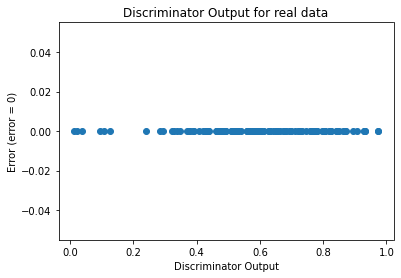

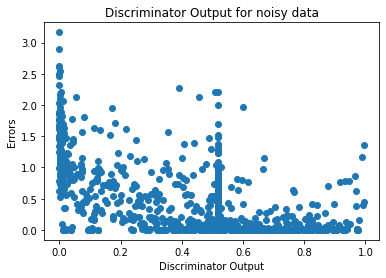

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 1065


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.12317306096782431


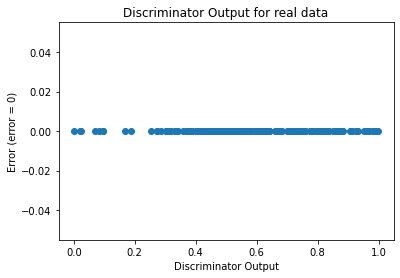

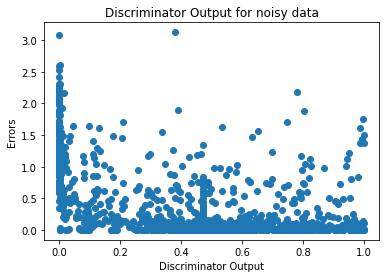

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13203700675845417


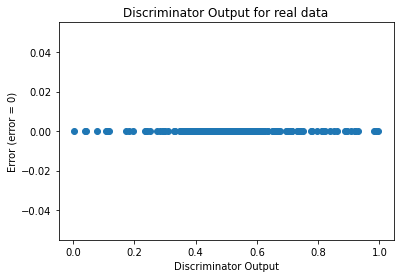

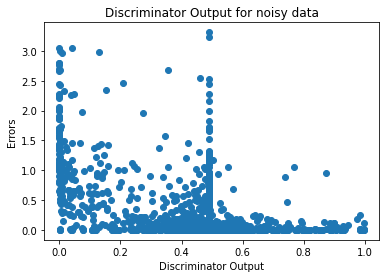

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8337]], requires_grad=True)
